In [7]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD


## Cargar los archivos


In [8]:
PATH = "../data/dataset/final_no_movieid"
print("Cargando archivos")
X_train = pd.read_csv(PATH+"/X_trained_scaled_final_no_cat_noid.csv")
X_test  = pd.read_csv(PATH + "/X_test_scaled_final_no_cat_noid.csv")
print(f"Train: {X_train.shape[0]} filas × {X_train.shape[1]} columnas")
print(f"Test : {X_test.shape[0]} filas × {X_test.shape[1]} columnas")

Cargando archivos
Train: 5233 filas × 1981 columnas
Test : 2223 filas × 1981 columnas


## Verificar que no haya NaN

In [9]:
if X_train.isna().sum().sum() > 0 or X_test.isna().sum().sum() > 0:
    print("Se detectaron NaN")
    X_train = X_train.fillna(0)
    X_test  = X_test.fillna(0)
else:
    print("Sin valores faltantes.")

Sin valores faltantes.


## Aplicamos SVD

### n-components

In [10]:
n_components = 150
svd = TruncatedSVD(n_components=n_components, random_state=42)
print("\n Aplicando Truncated SVD")
X_train_svd = svd.fit_transform(X_train)
X_test_svd  = svd.transform(X_test)


 Aplicando Truncated SVD


### Calculamos la varianza

In [11]:
var_exp = svd.explained_variance_ratio_.sum() * 100
print(f"\n Varianza total explicada: {var_exp:.2f}% con {n_components} componentes")


 Varianza total explicada: 72.70% con 150 componentes


## Guardamos los resultados

In [15]:
PATH2 = "../dimensionality_reduction/output_svd"
train_out = f"/X_train_svd_{n_components}.csv"
test_out  = f"/X_test_svd_{n_components}.csv"

pd.DataFrame(X_train_svd).to_csv(PATH2+train_out, index=False)
pd.DataFrame(X_test_svd).to_csv(PATH2 +test_out, index=False)

print(f"\nArchivos guardados correctamente:")
print(f"- {train_out} ({X_train_svd.shape[0]} × {X_train_svd.shape[1]})")
print(f"- {test_out}  ({X_test_svd.shape[0]} × {X_test_svd.shape[1]})")


Archivos guardados correctamente:
- /X_train_svd_150.csv (5233 × 150)
- /X_test_svd_150.csv  (2223 × 150)


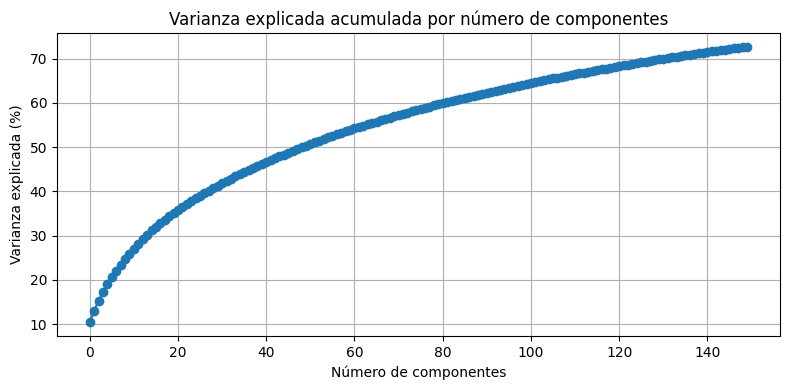

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(np.cumsum(svd.explained_variance_ratio_) * 100, marker='o')
plt.title("Varianza explicada acumulada por número de componentes")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.grid(True)
plt.tight_layout()
plt.show()
